In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('glider_august.csv')

# Select the desired columns
df = df[['m_present_time.timestamp', 'm_pitch.rad', 'm_pressure.bar', 'density_drv.kg/m3', 'm_depth.m', 'm_heading.rad']]

# Save the filtered DataFrame to a new CSV file (optional)
df.to_csv('filtered_file.csv', index=False)

# Display the filtered DataFrame
print(df)

        m_present_time.timestamp  m_pitch.rad  m_pressure.bar  \
0            2023-08-22 15:06:47          NaN             NaN   
1            2023-08-22 15:07:38    -0.493928        0.408335   
2            2023-08-22 15:07:46    -0.531383        0.404021   
3            2023-08-22 15:07:54    -0.568839        0.399708   
4            2023-08-22 15:07:58    -0.587566        0.399708   
...                          ...          ...             ...   
2289132      2023-09-20 12:48:27          NaN             NaN   
2289133      2023-09-20 12:48:28          NaN             NaN   
2289134      2023-09-20 12:48:29          NaN             NaN   
2289135      2023-09-20 12:48:30          NaN             NaN   
2289136      2023-09-20 12:48:31          NaN             NaN   

         density_drv.kg/m3  m_depth.m  m_heading.rad  
0                      NaN        NaN            NaN  
1                      NaN   4.083350       4.372050  
2                      NaN   4.040215       4.058223  

In [21]:
# Fill missing values using forward fill method
df_ffill = df.fillna(method='ffill')

# Or fill missing values using backward fill method
df_bfill = df.fillna(method='bfill')

# You can also combine both forward fill and backward fill to ensure all missing values are filled
df = df.fillna(method='ffill').fillna(method='bfill')

df.count()

/tmp/ipykernel_3099/2503049255.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipykernel_3099/2503049255.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')
/tmp/ipykernel_3099/2503049255.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


m_present_time.timestamp    2289137
m_pitch.rad                 2289137
m_pressure.bar              2289137
density_drv.kg/m3           2289137
m_depth.m                   2289137
m_heading.rad               2289137
dtype: int64

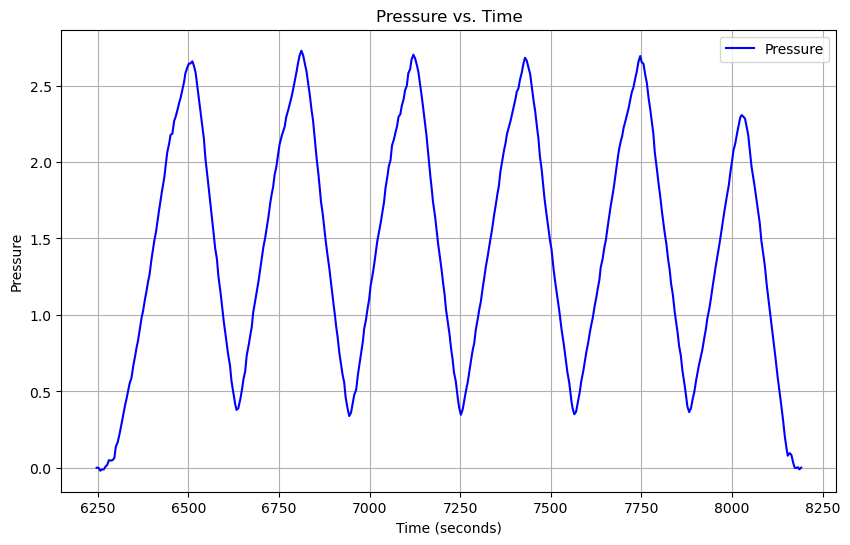

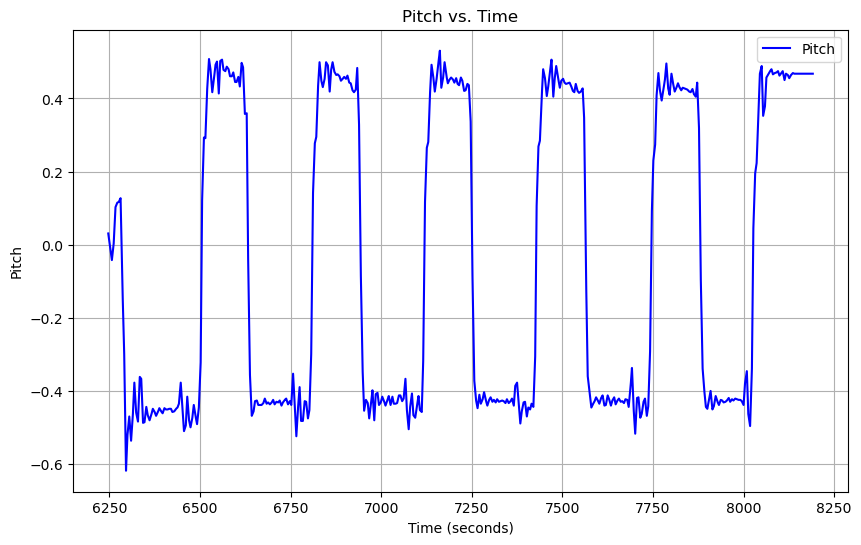

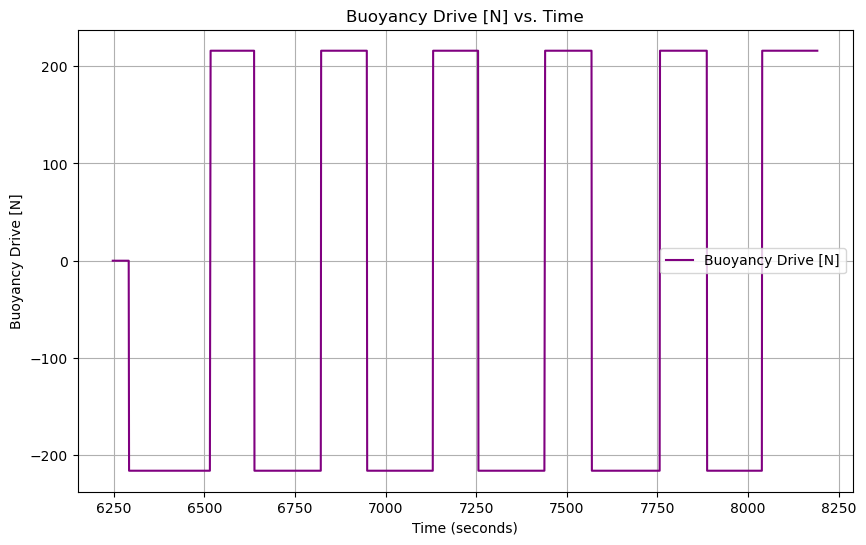

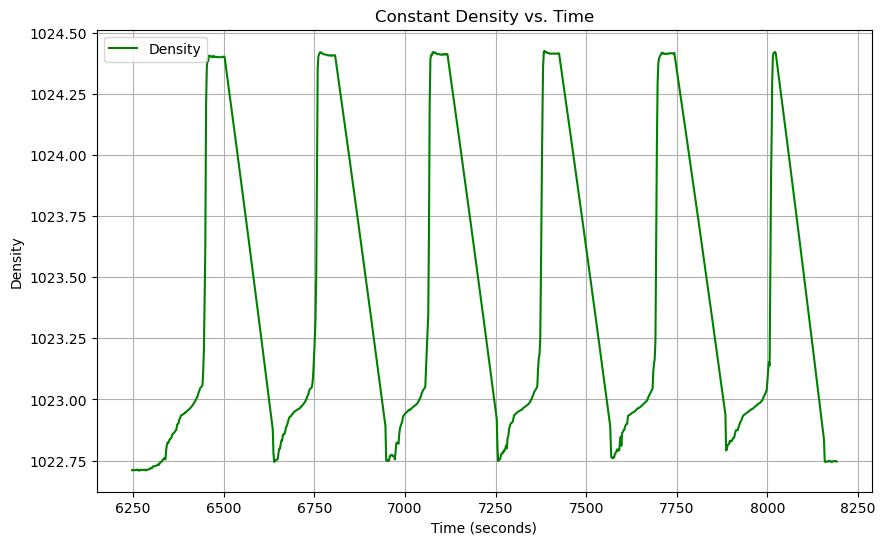

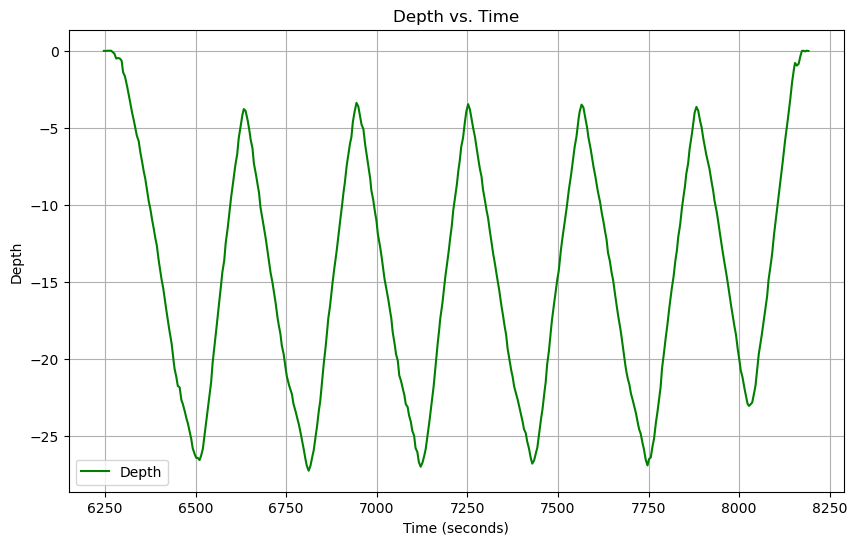

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def convert_volume_to_force(volume_cc, density, gravity=9.81):
    volume_m3 = volume_cc * 1e-6
    mass_water = volume_m3 * density
    buoyancy_force = mass_water * gravity
    return buoyancy_force

# Sample DataFrame creation (assuming df is already loaded)
# df = pd.read_csv('your_file.csv')  # Example of loading data

# Convert 'time' column to datetime, specify format if known
df['m_present_time.timestamp'] = pd.to_datetime(df['m_present_time.timestamp'], errors='coerce')

# Convert time to seconds since the first timestamp
df['time_seconds'] = (df['m_present_time.timestamp'] - df['m_present_time.timestamp'].iloc[0]).dt.total_seconds()
 
# Transform columns to float type
df['time_seconds'] = df['time_seconds'].astype(float)
df['m_pitch.rad'] = df['m_pitch.rad'].astype(float)
df['m_pressure.bar'] = df['m_pressure.bar'].astype(float)
# df['m_ballast_pumped'] = df['m_ballast_pumped'].astype(float)
df['density_drv.kg/m3'] = df['density_drv.kg/m3'].astype(float)
df['m_depth.m'] = -df['m_depth.m'].astype(float)


# Assuming the volume in the problem statement is 56.3 liters,
# let's create a column for the buoyancy force in newtons
# df['buoyancy_drive'] = df['m_ballast_pumped'].apply(lambda x: convert_volume_to_force(x, density=1000))
# df['buoyancy_drive'] = df['m_ballast_pumped']/2
# Convert the selected columns to a NumPy array
array_data = df[['time_seconds', 'm_pressure.bar', 'm_pitch.rad', 'density_drv.kg/m3', 'm_depth.m', 'm_heading.rad']].to_numpy()



Begin_sample = 1000
num_sample = 1870

tctd = array_data[Begin_sample:Begin_sample+num_sample, 0]
P = array_data[Begin_sample:Begin_sample+num_sample, 1]
Pitch = array_data[Begin_sample:Begin_sample+num_sample, 2]
# buoyancy_drive = array_data[:num_sample, 3]
density = array_data[Begin_sample:Begin_sample+num_sample, 3]
depth = array_data[Begin_sample:Begin_sample+num_sample, 4]

# Plot Pressure vs. Time
plt.figure(figsize=(10, 6))
plt.plot(tctd, P, label='Pressure', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure')
plt.title('Pressure vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot Pitch vs. Time
plt.figure(figsize=(10, 6))
plt.plot(tctd, Pitch, label='Pitch', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch')
plt.title('Pitch vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Initialize the transformed pitch array with the same values as Pitch
buoyancy_drive = np.zeros_like(Pitch)

# Iterate over the pitch data and apply the conditions
for i in range(1, len(Pitch)):
    if Pitch[i] > 0.3:
        buoyancy_drive[i] = 216
    elif Pitch[i] < -0.3:
        buoyancy_drive[i] = -216
    else:
        buoyancy_drive[i] = buoyancy_drive[i-1]

# Plot the transformed pitch array vs. Time
plt.figure(figsize=(10, 6))
plt.plot(tctd, buoyancy_drive, label='Buoyancy Drive [N]', color='purple')
plt.xlabel('Time (seconds)')
plt.ylabel('Buoyancy Drive [N]')
plt.title('Buoyancy Drive [N] vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the density vector vs. Time
plt.figure(figsize=(10, 6))
plt.plot(tctd, density, label='Density', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.title('Constant Density vs. Time')
plt.legend()
plt.grid(True)
plt.show()


# Plot the depth vector vs. Time
plt.figure(figsize=(10, 6))
plt.plot(tctd, depth, label='Depth', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Depth')
plt.title('Depth vs. Time')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import numpy as np
import sys
sys.path.insert(0, '..')
import gliderflight
import matplotlib.pyplot as plt
# Setup a steady-state model to calibrate
GM = gliderflight.SteadyStateCalibrate(rho0=1021)  # rho0 might be the initial density.
GM.define(ah=3.8, Cd1=10.5)    # ah: lift angle coefficient due to the hull (1/rad);  Cd1 is induced drag coefficient (1/rad²)
GM.set_input_data(time=tctd, pressure=P, pitch=Pitch, buoyancy_change=buoyancy_drive, density=density)
GM.OR(P*10<0)
GM.OR(P*10>26)
GM.define(Cd0=0.15, mg=60, Vg=56.3/1000)   # Cd0 is the parasite drag coefficient; mg: mass of the glider (kg); Vg: volume of the glider (m³)
calibration_result = GM.calibrate("Cd0", "mg", verbose=True)

Error: 1.0840072e-01  -  Cd0=0.15  mg=60
Error: 1.0334550e-01  -  Cd0=0.1575  mg=60
Error: 2.5927211e-01  -  Cd0=0.15  mg=63
Error: 1.8054997e-02  -  Cd0=0.1575  mg=57
Error: 1.0070671e-01  -  Cd0=0.1612  mg=54
Error: 1.7455236e-02  -  Cd0=0.165  mg=57
Error: 5.1059763e-02  -  Cd0=0.1725  mg=55.5
Error: 9.8314625e-02  -  Cd0=0.165  mg=54
Error: 5.4105519e-02  -  Cd0=0.1631  mg=55.5
Error: 3.9987723e-02  -  Cd0=0.1594  mg=58.5
Error: 6.3077283e-03  -  Cd0=0.1603  mg=57.75
Error: 6.1850352e-03  -  Cd0=0.1678  mg=57.75
Error: 2.5620910e-02  -  Cd0=0.173  mg=58.12
Error: 3.9191680e-02  -  Cd0=0.1631  mg=58.5
Error: 9.3462930e-03  -  Cd0=0.1645  mg=57.38
Error: 2.6628682e-02  -  Cd0=0.1636  mg=58.12
Error: 1.5100207e-03  -  Cd0=0.1643  mg=57.56
Error: 1.5387925e-03  -  Cd0=0.1718  mg=57.56
Error: 9.2990398e-03  -  Cd0=0.1683  mg=57.38
Error: 2.7443108e-03  -  Cd0=0.1679  mg=57.66
Error: 2.7667775e-03  -  Cd0=0.1682  mg=57.47
Error: 1.8817951e-03  -  Cd0=0.168  mg=57.61
Error: 1.7267413e-03 

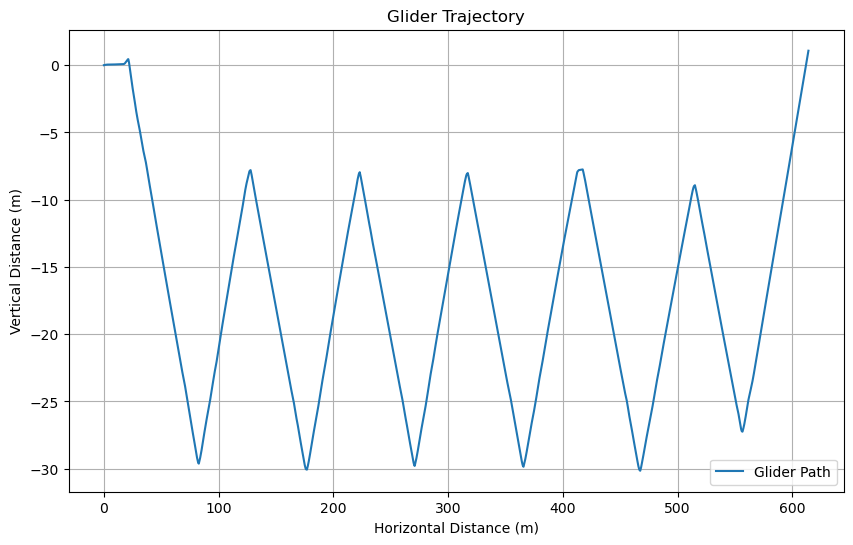

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure that pitch is in radians; if it's in degrees, convert it
pitch_rad = Pitch  # If pitch is in degrees

# Assuming time intervals are uniform
dt = np.diff(GM.t, prepend=GM.t[0])

# Calculate vertical and horizontal velocity components
wg = GM.wg
ug = wg / np.tan(pitch_rad)



# Calculate displacement in horizontal and vertical directions
dx = ug * dt
dz = wg * dt

# Accumulate displacement to compute position
x = np.cumsum(dx)
z = np.cumsum(dz)

# Plot the trajectory         .29
plt.figure(figsize=(10, 6))
plt.plot(x, z, label='Glider Path')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.title('Glider Trajectory')
plt.legend()
plt.grid(True)
plt.show()







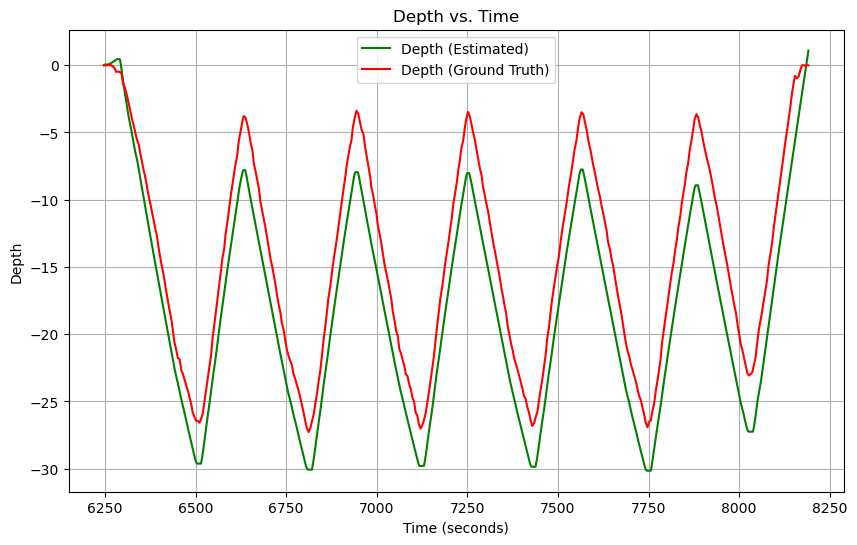

In [25]:
# Plot the depth vector vs. Time
plt.figure(figsize=(10, 6))
plt.plot(tctd, z, label='Depth (Estimated)', color='green')
plt.plot(tctd, depth, label='Depth (Ground Truth)', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Depth')
plt.title('Depth vs. Time')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import numpy as np

# Ensure the 'm_depth.m' column is of float type
condition = df['m_depth.m'].astype(float) < -1.0

# Find the boundaries of contiguous segments
segment_boundaries = np.diff(condition.astype(int))

# Start indices: where segment_boundaries equals 1
start_indices = np.where(segment_boundaries == 1)[0] + 1

# End indices: where segment_boundaries equals -1
end_indices = np.where(segment_boundaries == -1)[0] + 1

# If the condition is met at the first element, add 0 as a start index
if condition.iloc[0]:
    start_indices = np.insert(start_indices, 0, 0)

# If the condition is met at the last element, add the last index as an end index
if condition.iloc[-1]:
    end_indices = np.append(end_indices, len(condition))

# Combine start and end indices
segments = list(zip(start_indices, end_indices))

# Filter out segments with a length less than 100
segments = [(start, end) for start, end in segments if array_data[end,0] - array_data[start,0] >= 3600]

# Display the segments that meet the condition
segments


[(16949, 23879),
 (24382, 31314),
 (31936, 38935),
 (39431, 46338),
 (47324, 53758),
 (54221, 61211),
 (61730, 68647),
 (69145, 76110),
 (76599, 83632),
 (84114, 91067),
 (91574, 98533),
 (99021, 105989),
 (106596, 113573),
 (114293, 121333),
 (121820, 128825),
 (129436, 136433),
 (136969, 143893),
 (144321, 151253),
 (154910, 161862),
 (162351, 167822),
 (168357, 175359),
 (175851, 182788),
 (183280, 190315),
 (190806, 197765),
 (198256, 205147),
 (205610, 212530),
 (213010, 219948),
 (220583, 227543),
 (228079, 235055),
 (235571, 242559),
 (243040, 249916),
 (250408, 257381),
 (257857, 264829),
 (265323, 272273),
 (272765, 279704),
 (280187, 287252),
 (287741, 294672),
 (295151, 302218),
 (302764, 309816),
 (310308, 317349),
 (317842, 324943),
 (325458, 332025),
 (332502, 339536),
 (340057, 347016),
 (347524, 354508),
 (354982, 361970),
 (362477, 369605),
 (370096, 377221),
 (377715, 384849),
 (385347, 392299),
 (392771, 399851),
 (400330, 406147),
 (406662, 413710),
 (414202, 421261

In [27]:
x_array = np.zeros_like(array_data[:, 0])
for start, end in segments:
    print(end - start)
    segment_data = df.iloc[start:end]
    tctd = array_data[start:end, 0]
    P = array_data[start:end, 1]
    Pitch = array_data[start:end, 2]
    density = array_data[start:end, 3]
    depth = array_data[start:end, 4]

    # Initialize the transformed pitch array with the same values as Pitch
    buoyancy_drive = np.zeros_like(Pitch)

    # Iterate over the pitch data and apply the conditions
    for i in range(1, len(Pitch)):
        if Pitch[i] > 0.3:
            buoyancy_drive[i] = 216
        elif Pitch[i] < -0.3:
            buoyancy_drive[i] = -216
        else:
            buoyancy_drive[i] = buoyancy_drive[i-1]
    
    # Setup a steady-state model to calibrate
    GM = gliderflight.SteadyStateCalibrate(rho0=1021)
    GM.define(ah=3.8, Cd1=10.5)
    GM.set_input_data(time=tctd, pressure=P, pitch=Pitch, buoyancy_change=buoyancy_drive, density=density)
    GM.OR(P * 10 < 0)
    GM.OR(P * 10 > 26)
    GM.define(Cd0=0.15, mg=60, Vg=56.3 / 1000)
    calibration_result = GM.calibrate("Cd0", "mg", verbose=False)

    # Ensure that pitch is in radians; if it's in degrees, convert it
    pitch_rad = Pitch  # Assuming pitch is already in radians

    # Assuming time intervals are uniform
    dt = np.diff(GM.t, prepend=GM.t[0])

    # Calculate vertical and horizontal velocity components
    wg = GM.wg
    ug = wg / np.tan(pitch_rad)

    # Calculate displacement in horizontal and vertical directions
    dx = ug * dt
    dz = wg * dt

    # Accumulate displacement to compute position
    x = np.cumsum(dx)
    z = np.cumsum(dz)
    
    # Store the final x position for the segment
    x_array[end] = x[-1]

    # Reset cumulative sums for next segment
    x = 0
    z = 0





6930
6932
6999
6907
6434
6990


/tmp/ipykernel_3099/3063460049.py:40: RuntimeWarning: invalid value encountered in divide
  ug = wg / np.tan(pitch_rad)


6917
6965
7033
6953
6959
6968
6977
7040
7005
6997
6924
6932
6952
5471
7002
6937
7035
6959
6891
6920
6938
6960
6976
6988
6876
6973
6972
6950
6939
7065
6931
7067
7052
7041
7101
6567
7034
6959
6984
6988
7128
7125
7134
6952
7080
5817
7048
7059
7050
6934
6992
7059
6947
7109
7106
6943
7202
7072
7079
6966
6953
6948
7045
7119
6584
7082
7029
7099
7069
7243
7337
7217
7380
7443
7434
7372
7304
7392
7318
7359
7376
7367
7035
7193
6996
7141
6982
7392
6981
7367
7421
7448
7327
7346
7252
7200
7256
7041
7020
7409
7402
7419
7275
7318
7246
7137
7273
7085
7121
7035
7262
7262
7144
7192
7062
7088
7080
7105
6986
6956
7368
7038
7033
7024
7212
7232
7176
7389
7329
7375
7110
7060
7334
7073
7031
7047
7165
7079
7112
7261
7432
5741
7054
6985
7000
6949
6977
7052
7205
7205
7130
7021
7066
7162
7041
7052
7078
7061
7050
7030
7285
7043
7383
7020
7264
7234
7211
7052
7183
7064
7148
7013
7067
6957
7121
6988
7084
7094
7131
7174
7410
7105
7074
7319
7177
10812
10834
10860
10574
10540
10789
10769
10515
11026
11076
10911
10874
108

In [28]:
df2 = pd.read_csv('glider_august.csv')
df2['horizontal_distance'] = x_array

In [29]:
df2.to_csv('glider_august_after.csv', index=False)

In [39]:
df2

,Unnamed: 0,m_present_time.timestamp,m_final_water_vx.m/s,m_final_water_vy.m/s,m_gps_lat.lat,m_gps_lon.lon,m_pitch.rad,m_roll.rad,m_heading.rad,m_depth.m,...,m_water_depth.m,sci_water_pressure.bar,sci_water_cond.s/m,sci_water_temp.degc,sci_bsipar_par.ue/m^2sec,sci_bsipar_sensor_volts.volts,sci_bsipar_temp.degc,salinity_drv.psu,density_drv.kg/m3,horizontal_distance
0,1,2023-08-22 15:06:47,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.0200,0.000030,35.13810,0.000,0.000000,0.00,-0.000245,NaN,0.0
1,2,2023-08-22 15:07:38,0.000000,0.00000,NaN,NaN,-0.493928,0.010472,4.372050,4.083350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,3,2023-08-22 15:07:46,-0.075666,-0.02896,NaN,NaN,-0.531383,0.029532,4.058223,4.040215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,4,2023-08-22 15:07:54,-0.151332,-0.05792,NaN,NaN,-0.568839,0.048592,3.744395,3.997080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,5,2023-08-22 15:07:58,-0.189165,-0.07240,NaN,NaN,-0.587566,0.058122,3.587482,3.997080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289132,7110250,2023-09-20 12:48:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.0110,0.019490,20.65810,814.639,1.890850,24.36,0.100694,998.144830,0.0
2289133,7210087,2023-09-20 12:48:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.0110,0.019355,20.65315,811.883,1.884490,24.36,0.099993,998.145350,0.0
2289134,7310079,2023-09-20 12:48:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.0110,0.019220,20.64820,816.852,1.895960,24.36,0.099292,998.145870,0.0
2289135,7410084,2023-09-20 12:48:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.0105,0.019140,20.64390,693.809,1.611860,24.36,0.098880,998.146495,0.0


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Radius of Earth in meters
    R = 6371000  # meters
    
    # Calculate the distance
    distance = R * c
    return distance

count = 0
error_sum = 0
results = []  # Initialize the list to store results
for start, end in segments:
    count = count + 1
    # print(end - start)
    lat = df2['m_gps_lat.lat'].astype(float).to_numpy()
    lon = df2['m_gps_lon.lon'].astype(float).to_numpy()
    initial_lat = lat[start]
    initial_lon = lon[start]
    ground_truth_lat = lat[end]
    ground_truth_lon = lon[end]
    segment_data = df.iloc[start:end]
    tctd = array_data[start:end, 0]
    P = array_data[start:end, 1]
    Pitch = array_data[start:end, 2]
    density = array_data[start:end, 3]
    depth = array_data[start:end, 4]

    # Initialize the transformed pitch array with the same values as Pitch
    buoyancy_drive = np.zeros_like(Pitch)

    # Iterate over the pitch data and apply the conditions
    for i in range(1, len(Pitch)):
        if Pitch[i] > 0.3:
            buoyancy_drive[i] = 216
        elif Pitch[i] < -0.3:
            buoyancy_drive[i] = -216
        else:
            buoyancy_drive[i] = buoyancy_drive[i-1]
    
    # Setup a steady-state model to calibrate
    GM = gliderflight.SteadyStateCalibrate(rho0=1021)
    GM.define(ah=3.8, Cd1=10.5)
    GM.set_input_data(time=tctd, pressure=P, pitch=Pitch, buoyancy_change=buoyancy_drive, density=density)
    GM.OR(P * 10 < 0)
    GM.OR(P * 10 > 26)
    GM.define(Cd0=0.15, mg=60, Vg=56.3 / 1000)
    calibration_result = GM.calibrate("Cd0", "mg", verbose=False)

    # Ensure that pitch is in radians; if it's in degrees, convert it
    pitch_rad = Pitch  # Assuming pitch is already in radians

    # Assuming time intervals are uniform
    dt = np.diff(GM.t, prepend=GM.t[0])

    # Calculate vertical and horizontal velocity components


    # Assuming heading is in degrees and needs to be converted to radians
    heading_rad = array_data[start:end, 5]
    print(P.size)
    print(ug.size)

    # Calculate vertical and horizontal velocity components
    wg = GM.wg
    ug = wg / np.tan(pitch_rad)

    # Calculate horizontal velocity components
    vx = ug * np.cos(heading_rad)  # Eastward velocity component
    vy = ug * np.sin(heading_rad)  # Northward velocity component

    # Calculate displacement in horizontal directions
    dx_east = vx * dt
    dy_north = vy * dt

    # Accumulate displacements to compute positions
    x_east = np.cumsum(dx_east)
    y_north = np.cumsum(dy_north)

    dz = wg * dt
    # Use the previously calculated vertical displacement
    z = np.cumsum(dz)

    # Plotting the 3D trajectory
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x_east, y_north, z, label='3D Trajectory')
    ax.set_xlabel('East (m)')
    ax.set_ylabel('North (m)')
    ax.set_zlabel('Vertical (m)')
    ax.legend()

    plt.show()


    # Constants
    METERS_PER_DEGREE_LAT = 111000  # Meters per degree of latitude
    EARTH_RADIUS_METERS = 6371000  # Earth radius in meters


    # Convert displacements to latitude and longitude changes
    delta_lat = dy_north / METERS_PER_DEGREE_LAT
    delta_lon = dx_east / (METERS_PER_DEGREE_LAT * np.cos(np.radians(initial_lat)))

    # Calculate final latitude and longitude
    final_lat = initial_lat + delta_lat
    final_lon = initial_lon + delta_lon

    distance_meters = haversine(final_lat[-1], final_lon[-1], ground_truth_lat, ground_truth_lon)
    error_sum = error_sum + distance_meters


    print(f"Beginning time: {df2['m_present_time.timestamp'][start]}")
    print(f"Ending time: {df2['m_present_time.timestamp'][end]}")
    print(f"Period for underwater {df['time_seconds'][end]- df['time_seconds'][start]}")
    print(f"Initial Latitude: {initial_lat}")
    print(f"Initial Longitude: {initial_lon}")


    print(f"Final Latitude (estimated): {final_lat[-1]}")
    print(f"Final Longitude (estimated): {final_lon[-1]}")

    print(f"Final Latitude (GT): {ground_truth_lat}")
    print(f"Final Longitude (GT): {ground_truth_lon}")


    print(f"Distance between estimated and GT coordinates: {distance_meters:.2f} meters")


        # Append results to the list
    results.append({
        'Beginning Time': df2['m_present_time.timestamp'][start],
        'Ending Time': df2['m_present_time.timestamp'][end],
        'Period (s)': df['time_seconds'][end] - df['time_seconds'][start],
        'Initial Latitude': initial_lat,
        'Initial Longitude': initial_lon,
        'Final Latitude (estimated)': final_lat[-1],
        'Final Longitude (estimated)': final_lon[-1],
        'Final Latitude (GT)': ground_truth_lat,
        'Final Longitude (GT)': ground_truth_lon,
        'Distance (meters)': distance_meters
    })

    if count == 6:
        break


# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv('trajectory_errors.csv', index=False)



print(f"Average Error (meters): {error_sum/count}")



6930
6981
Beginning time: 2023-08-22 22:19:17
Ending time: 2023-08-23 00:19:10
Period for underwater 7193.0
Initial Latitude: 34.290322
Initial Longitude: -76.8269996666667
Final Latitude (estimated): 34.29032539260806
Final Longitude (estimated): -76.82699970248973
Final Latitude (GT): 34.2916351797137
Final Longitude (GT): -76.8104336359243
Distance between estimated and GT coordinates: 1528.84 meters
6932
6930
Beginning time: 2023-08-23 00:33:32
Ending time: 2023-08-23 02:33:29
Period for underwater 7197.0
Initial Latitude: 34.29111
Initial Longitude: -76.8123666666667
Final Latitude (estimated): 34.29111320647413
Final Longitude (estimated): -76.81236813319835
Final Latitude (GT): 34.2859988927304
Final Longitude (GT): -76.7937077545752
Distance between estimated and GT coordinates: 1806.20 meters
6999
6932
Beginning time: 2023-08-23 02:48:14
Ending time: 2023-08-23 04:49:22
Period for underwater 7268.0
Initial Latitude: 34.2843483333333
Initial Longitude: -76.7953816666667
Final L

/tmp/ipykernel_3099/406130307.py:79: RuntimeWarning: invalid value encountered in divide
  ug = wg / np.tan(pitch_rad)
